Lehcene Mohamed Lemine => SDIA ML

In [10]:
#STUP 1 => Importer Librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

Lehcene Mohamed Lemine => SDIA ML

In [11]:
#Stup 2 => Telecharger Data Set occupancy
dataset = pd.read_csv("C:/Users/HP/Desktop/ExamenMLSDIA/Data/occupancy.csv")
dataset.head(5)
#

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Lehcene Mohamed Lemine => SDIA ML

In [12]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


Lehcene Mohamed Lemine => SDIA ML

In [13]:
#Setup  3 => Cleaning Data
df = dataset.drop(["date","Temperature","Humidity","HumidityRatio"],axis=1)
df.head()

,Light,CO2,Occupancy
140,585.200000,749.200000,1
141,578.400000,760.400000,1
142,572.666667,769.666667,1
143,493.750000,774.750000,1
144,488.600000,779.000000,1


Lehcene Mohamed Lemine => SDIA ML

In [14]:
#Setup 4 => Normalize Features
df.iloc[:,0:2] = (df-df.mean())/(df.std())
df.head()

,Light,CO2,Occupancy
140,1.566568,0.106920,1
141,1.539391,0.145187,1
142,1.516477,0.176848,1
143,1.201077,0.194216,1
144,1.180494,0.208737,1


Lehcene Mohamed Lemine => SDIA ML

In [15]:
#Stup  5 => Separer Features => X and Target => y
X = df[['Light', 'CO2']].values
y = df[['Occupancy']].values

Lehcene Mohamed Lemine => SDIA ML

In [16]:
X

array([[1.56656818, 0.10692   ],
       [1.53939111, 0.14518683],
       [1.51647711, 0.17684807],
       ...,
       [2.49298664, 1.39364198],
       [2.47700012, 1.38407528],
       [2.4170507 , 1.38749196]])

Lehcene Mohamed Lemine => SDIA ML

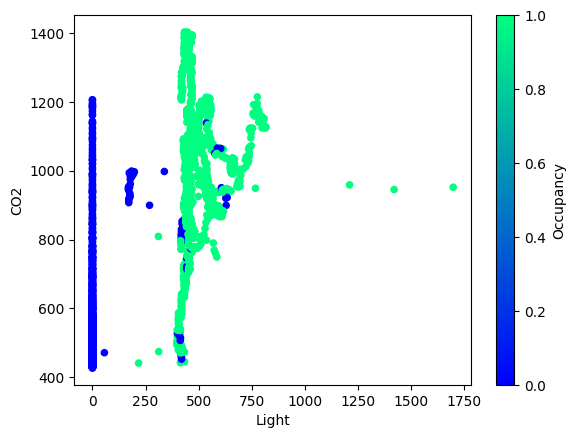

In [17]:
dataset.plot.scatter(x='Light',y='CO2', c='Occupancy', colormap='winter')
plt.show() 

Lehcene Mohamed Lemine => SDIA ML

In [18]:
#Setup 6 => Develloper la modele
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

Lehcene Mohamed Lemine => SDIA ML

In [20]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

Lehcene Mohamed Lemine => SDIA ML

In [21]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

Lehcene Mohamed Lemine => SDIA ML

In [22]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

Lehcene Mohamed Lemine => SDIA ML

In [23]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

Lehcene Mohamed Lemine => SDIA ML

In [24]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

Lehcene Mohamed Lemine => SDIA ML

In [25]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

Lehcene Mohamed Lemine => SDIA ML

Afficher Evolution des erreurs pour notre model

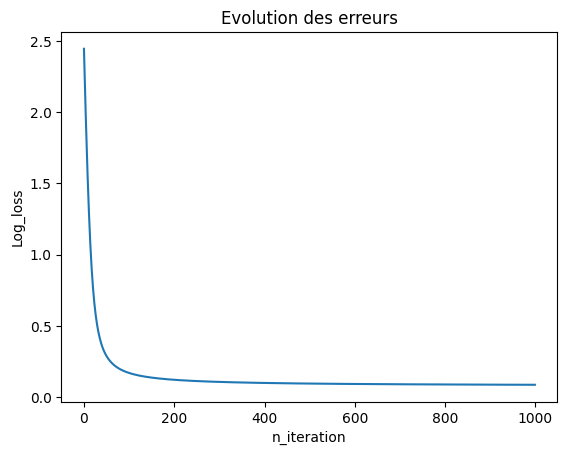

In [26]:
W,b=regression_logistique(X, y)


Lehcene Mohamed Lemine => SDIA ML

In [27]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)

[[0.97964593]
 [0.97856188]
 [0.97759123]
 ...
 [0.99972997]
 [0.99971254]
 [0.99965025]]


La Predition pour Tester notre Model avec nouvelle donnée

In [28]:
y_pred2 = predict(np.array([1,2]), W, b)
print(y_pred2)

[0.97898259]
[ True]


Lehcene Mohamed Lemine => SDIA ML

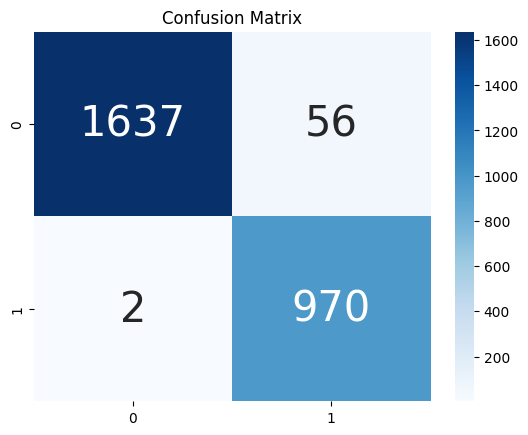

In [29]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()